In [63]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from wordcloud import WordCloud

import re
import nltk

from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from nltk.stem import PorterStemmer, WordNetLemmatizer

In [64]:
custom_stopwords = set(["book", "nt", "day","man", "men", "woman", "could", "also", "get", "thing", "way"])
stop_words = set(stopwords.words('english')) | custom_stopwords

def preprocess_text(text):
    tokenized_text = word_tokenize(text.lower())

    filtered_text = [word for word in tokenized_text if word not in stop_words]
    
    # Remove non-alphanumeric characters (except underscores)
    filtered_text = [re.sub(r'\W+', '', word) for word in filtered_text]
    
    # Remove numeric tokens
    filtered_text = [word for word in filtered_text if not word.isdigit()]
    
    lemmatizer = WordNetLemmatizer()
    lemmatized_text = [lemmatizer.lemmatize(word) for word in filtered_text]
    
    return ' '.join(lemmatized_text)



## Descriptions

In [65]:
corpus_data = pd.read_csv("cleaned_data/books_withRatings.csv")
corpus_data.head(10)

,Title,description,authors,publisher,publishedDate,categories,ratingsCount,review/score
0,The Rabbi's Cat,Gaining the ability to speak after swallowing ...,['Joann Sfar'],Pantheon,2005,['Comics & Graphic Novels'],25.0,3.111111
1,From Potter's Field,"The sixth book in the Kay Scarpetta series, fr...",['Patricia Cornwell'],Hachette UK,2008-09-04,['Fiction'],19.0,3.200000
2,Economics in one lesson,"With over a million copies sold, Economics in ...",['Henry Hazlitt'],Currency,2010-08-11,['Business & Economics'],18.0,3.084337
3,Plain And Simple - A Woman's Journey To The Amish,"""I had an obsession with the Amish. Plan and s...",['Sue Bender'],Harper Collins,2009-03-17,['Religion'],11.0,2.857143
4,The Castle in the Attic,The classic children's story about a young boy...,['Elizabeth Winthrop'],Holiday House,2012-05-15,['Juvenile Fiction'],21.0,2.833333
5,Dumb witness,An elderly spinster has been poisoned in her c...,['AGATHA. CHRISTIE'],HarperCollins,2018-03-22,NaN,21.0,5.000000
6,Mothman Prophecies,This true account of the aliens who invaded th...,['John A. Keel'],Hachette UK,2013-03-28,"['Body, Mind & Spirit']",13.0,2.533333
7,The Gods of Mars,The Barsoom series continues: John Carter retu...,['Edgar Rice Burroughs'],Open Road Media,2020-03-17,['Fiction'],26.0,4.500000
8,The Forsythe Saga,The Forsyte Saga was the title originally dest...,['John Galsworthy'],FilRougeViceversa,2021-08-27,['Fiction'],20.0,4.083333
9,Learning To Bow - Inside The Heart Of Japan,The author describes his experiences teaching ...,['Bruce S. Feiler'],Mariner Books,1991,['Education'],11.0,2.400000


In [66]:
# Apply the preprocessing function to each description in the DataFrame
corpus_data['processed_text'] = corpus_data['description'].apply(preprocess_text)

# Create a CountVectorizer
vectorizer = CountVectorizer(ngram_range = (1,2),  min_df=0.02,max_df=0.8, stop_words='english')

# Fit and transform the processed text to create the Document-Term Matrix (DTM)
dtm = vectorizer.fit_transform(corpus_data['processed_text'])

# Convert the DTM to a DataFrame
dtm_df = pd.DataFrame(dtm.toarray(), columns=vectorizer.get_feature_names_out())

In [67]:
dtm_df

,acclaimed,account,adventure,age,ago,america,american,ancient,angeles,answer,...,working,world,world war,writer,writing,written,year,york,york time,young
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,1,0,1,0,0,0,0,...,0,0,0,2,1,0,0,2,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,1,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,3,0,0,0,0,0,1,0,0
4,0,0,1,0,0,0,0,0,0,0,...,1,0,0,0,0,0,0,0,0,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4288,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4289,0,0,0,0,0,0,0,0,0,0,...,0,2,0,0,0,0,1,0,0,0
4290,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,1,0
4291,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [68]:
dtm_df.to_csv("processed_text/descriptions_dtm.csv", index = False)

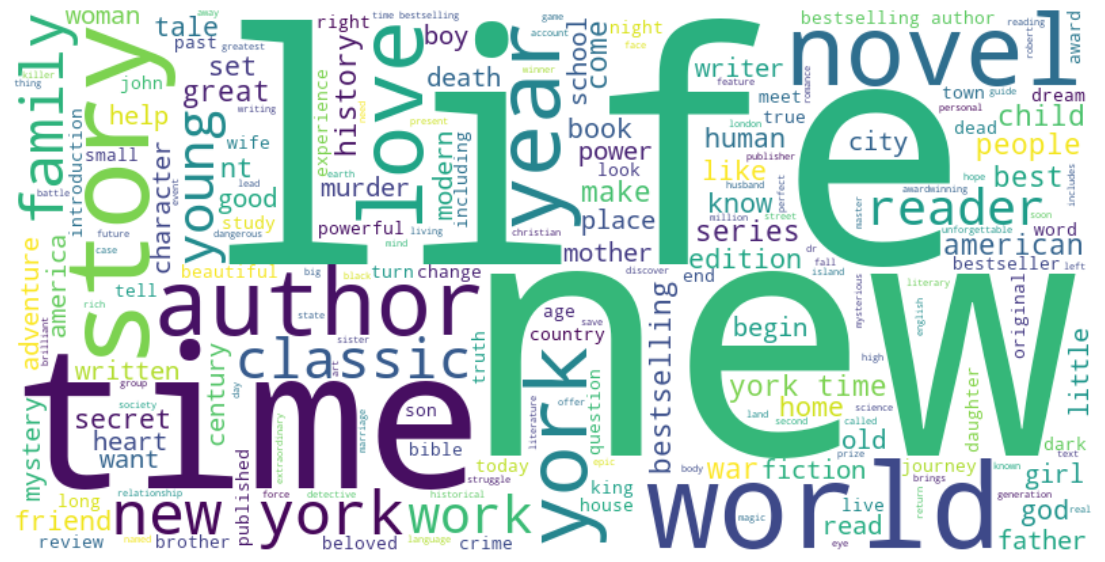

In [69]:
word_freq = dtm_df.sum().to_dict()

wordcloud = WordCloud(width=800, height=400, background_color='white').generate_from_frequencies(word_freq)

plt.figure(figsize=(14, 8))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')  # Turn off axis labels
plt.show()


In [70]:
corpus_data['processed_text'] = corpus_data['description'].apply(preprocess_text)

tfidf_vectorizer = TfidfVectorizer(ngram_range=(1, 2), min_df=0.04, max_df=0.8, norm=None)
tfidf = tfidf_vectorizer.fit_transform(corpus_data['processed_text'])


tfidf_df = pd.DataFrame(tfidf.toarray(), columns=tfidf_vectorizer.get_feature_names_out())

# Display the Document-Term Matrix
tfidf_df

,account,across,adventure,age,america,american,another,around,author,back,...,work,world,would,writer,written,year,yet,york,york time,young
0,0.0,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.0,0.000000,0.00000,...,0.000000,0.000000,0.0,0.000000,0.0,0.00000,0.000000,0.000000,0.000000,0.000000
1,0.0,0.000000,0.000000,3.909653,3.831584,0.0,0.000000,0.0,2.558145,3.57196,...,6.176661,0.000000,0.0,7.269748,0.0,0.00000,0.000000,5.627787,0.000000,0.000000
2,0.0,3.994336,0.000000,0.000000,0.000000,0.0,0.000000,0.0,0.000000,0.00000,...,3.088330,0.000000,0.0,0.000000,0.0,2.66056,0.000000,0.000000,0.000000,0.000000
3,0.0,0.000000,0.000000,0.000000,0.000000,0.0,4.051768,0.0,0.000000,0.00000,...,3.088330,7.137996,0.0,0.000000,0.0,0.00000,3.851545,2.813894,0.000000,0.000000
4,0.0,0.000000,3.733762,0.000000,0.000000,0.0,0.000000,0.0,0.000000,0.00000,...,0.000000,0.000000,0.0,0.000000,0.0,0.00000,0.000000,0.000000,0.000000,5.926114
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4288,0.0,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.0,0.000000,0.00000,...,0.000000,0.000000,0.0,0.000000,0.0,0.00000,0.000000,0.000000,0.000000,0.000000
4289,0.0,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.0,0.000000,0.00000,...,0.000000,4.758664,0.0,0.000000,0.0,2.66056,0.000000,0.000000,0.000000,0.000000
4290,0.0,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.0,0.000000,3.57196,...,0.000000,0.000000,0.0,0.000000,0.0,0.00000,3.851545,2.813894,3.124698,0.000000
4291,0.0,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.0,0.000000,0.00000,...,0.000000,0.000000,0.0,0.000000,0.0,0.00000,0.000000,0.000000,0.000000,0.000000


In [71]:
tfidf_df.to_csv("processed_text/descriptions_tfidf.csv", index = False)

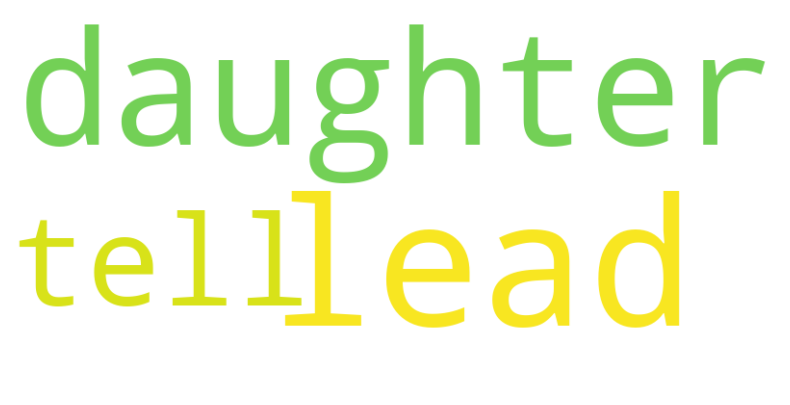

In [72]:
word_tfidf = dict(zip(tfidf_vectorizer.get_feature_names_out(), tfidf_df.iloc[0]))

# Generate a word cloud based on TF-IDF values
wordcloud = WordCloud(width=800, height=400, background_color='white', max_words=100).generate_from_frequencies(word_tfidf)

# Display the word cloud using matplotlib
plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')  # Turn off axis labels
plt.show()

## Reviews

In [73]:
corpus_data = pd.read_csv("cleaned_data/cleaned_ratings.csv")
corpus_data.head(10)

,Title,review/helpfulness,review/score,review/summary,review/text
0,The Rabbi's Cat,25/27,5.0,"A wonderful, funny-sad book",The Rabbi's Cat is a wonderful book. I heard t...
1,The Rabbi's Cat,14/14,5.0,My Rabbi loved this book too,This book is great fun to read. The cat is a w...
2,The Rabbi's Cat,14/15,5.0,"This is the most wonderful, charming Jewish bo...",What can I say? The cat is one of the most cha...
3,The Rabbi's Cat,22/26,4.0,Blessed are those who transgress,This book works on many different levels. I fe...
4,The Rabbi's Cat,8/13,3.0,Too Aimless for My Taste,"I've long been a fan of the graphic novel, and..."
5,The Rabbi's Cat,5/21,1.0,Unpleasant and disappointing,"This is a nasty, mean-spirited book that exhib..."
6,The Rabbi's Cat,1/15,3.0,Grafic Novels,Our book club tried the Rabbi's Cat to see wha...
7,The Rabbi's Cat,15/51,1.0,Self-Serving Message,"This is the tale of a kindly Rabbi, his sweet ..."
8,The Rabbi's Cat,6/33,1.0,Not what it looks like on the cover.,As someone who is interested in different cult...
9,From Potter's Field,4/14,2.0,More of a &quot;yawn&quot; than a &quot;scream...,"Usually I read &quot;general fiction&quot;, bu..."


In [74]:
corpus_data["review/summary"] = corpus_data["review/summary"].astype(str)

corpus_data['processed_title'] = corpus_data['review/summary'].apply(preprocess_text)
corpus_data['processed_review'] = corpus_data['review/text'].apply(preprocess_text)

Weighting the summary of the review 4 times as much as the text

In [75]:
tfidf_vectorizer = TfidfVectorizer(ngram_range=(1, 2), min_df=0.05, max_df=0.7, norm=None)
tfidf_review = tfidf_vectorizer.fit_transform(corpus_data['processed_review'])
tfidf_title = tfidf_vectorizer.transform(corpus_data['processed_title'])

In [76]:
tfidf_df = pd.DataFrame(tfidf_review.toarray() + tfidf_title.toarray() * 4, columns=tfidf_vectorizer.get_feature_names_out())
tfidf_df

,able,action,actually,age,ago,almost,along,already,although,always,...,would,write,writer,writing,written,wrong,wrote,year,yet,young
0,0.0,0.0,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,...,0.000000,0.0,0.0,0.0,0.0,0.0,0.000000,0.000000,0.0,0.000000
1,0.0,0.0,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,...,0.000000,0.0,0.0,0.0,0.0,0.0,0.000000,0.000000,0.0,0.000000
2,0.0,0.0,0.000000,0.0,0.000000,6.732245,0.000000,0.000000,3.594239,3.35759,...,4.093474,0.0,0.0,0.0,0.0,0.0,0.000000,10.250798,0.0,0.000000
3,0.0,0.0,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,...,0.000000,0.0,0.0,0.0,0.0,0.0,0.000000,0.000000,0.0,0.000000
4,0.0,0.0,0.000000,0.0,0.000000,0.000000,3.788588,0.000000,0.000000,0.00000,...,0.000000,0.0,0.0,0.0,0.0,0.0,0.000000,0.000000,0.0,3.491233
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
94502,0.0,0.0,3.366122,0.0,0.000000,0.000000,0.000000,3.925344,0.000000,0.00000,...,2.046737,0.0,0.0,0.0,0.0,0.0,0.000000,0.000000,0.0,10.473699
94503,0.0,0.0,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,3.35759,...,0.000000,0.0,0.0,0.0,0.0,0.0,3.948086,0.000000,0.0,0.000000
94504,0.0,0.0,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,...,0.000000,0.0,0.0,0.0,0.0,0.0,0.000000,0.000000,0.0,0.000000
94505,0.0,0.0,0.000000,0.0,0.000000,3.366122,0.000000,0.000000,0.000000,0.00000,...,0.000000,0.0,0.0,0.0,0.0,0.0,3.948086,0.000000,0.0,0.000000


In [77]:
tfidf_df.to_csv("processed_text/reviews_tfidf.csv", index = False)

## Lasso:
For fun, trying to predict reviews

In [78]:
from sklearn.linear_model import Lasso
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.metrics import mean_squared_error
from sklearn.preprocessing import StandardScaler

In [79]:
scores = corpus_data["review/score"]
X_train, X_test, y_train, y_test = train_test_split(tfidf_df, scores, test_size=0.2, random_state=42)

In [80]:
# Normalize the features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [81]:
lasso_model = Lasso()

# Define a range of alpha values to search
alphas = np.logspace(-4, 4, 9)

# Create a parameter grid
param_grid = {'alpha': alphas}

# Perform grid search with cross-validation
grid_search = GridSearchCV(lasso_model, param_grid, cv=5, scoring='neg_mean_squared_error')
grid_search.fit(X_train_scaled, y_train)

# Get the best alpha value
best_alpha = grid_search.best_params_['alpha']

# Create a Lasso regression model with the best alpha
lasso_model_best = Lasso(alpha=best_alpha)

# Fit the model to the scaled training data
lasso_model_best.fit(X_train_scaled, y_train)

# Make predictions on the scaled test set
y_pred = lasso_model_best.predict(X_test_scaled)

# Evaluate the model
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)

print(f"Best alpha: {best_alpha}")
print(f"Root Mean Squared Error: {rmse}")

Best alpha: 0.001
Root Mean Squared Error: 1.421792182522614


In [82]:
tfidf_df.columns[lasso_model_best.coef_ != 0]

Index(['able', 'action', 'actually', 'age', 'ago', 'almost', 'along',
       'already', 'although', 'always',
       ...
       'would', 'write', 'writer', 'writing', 'written', 'wrong', 'wrote',
       'year', 'yet', 'young'],
      dtype='object', length=263)